<a href="https://colab.research.google.com/github/Maryna-Maksimava/Machine_Learning/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**I conducted 50 tests of my KNN model and the accuracy results were the following:**
[0.9988129363558026, 0.9988217294198336, 0.9987250057154916, 0.9987513849075849, 0.9986898334593672, 0.9988656947399891, 0.9987865571637092, 0.9988305224838647, 0.9986986265233984, 0.9986546612032429, 0.9988041432917715, 0.9989272461882067, 0.9986986265233984, 0.9988393155478958, 0.9987777640996782, 0.998575523626963, 0.998663454267274, 0.9986370750751807, 0.9987513849075849, 0.9988656947399891, 0.9987337987795227, 0.9987162126514605, 0.9987425918435539, 0.9987513849075849, 0.9986106958830874, 0.9986546612032429, 0.9987162126514605, 0.9987777640996782, 0.9987689710356471, 0.998760177971616, 0.9986898334593672, 0.998848108611927, 0.9986722473313051, 0.9988129363558026, 0.9987777640996782, 0.9988041432917715, 0.9988920739320823, 0.9987074195874295, 0.9987865571637092, 0.9986370750751807, 0.9986194889471185, 0.9989887976364243, 0.9986194889471185, 0.9986106958830874, 0.9986722473313051, 0.9988744878040202, 0.9988217294198336, 0.9986898334593672, 0.9986898334593672, 0.9986019028190564]


**Average accuracy is:**

0.9987445263176405


Since this dataset is balanced (50% of 0, 50% of 1), accuracy is the best metric for asssessing results, and the result is pretty decent.

# Preparation

***About Dataset***

**Description**: This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

**Key Features**:

**id**: Unique identifier for each transaction
**V1-V28**: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
**Amount**: The transaction amount
**Class**: Binary label indicating whether the transaction is fraudulent (1) or not (0)
**Data Source**: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines.

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy as sp
warnings.filterwarnings('ignore')
#df = pd.read_csv("C:/Users/75025/Downloads/archive (4) 2/creditcard_2023.csv")
df = pd.read_csv("/jobs/creditcard_2023.csv")
"""for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float16')
        """
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


# EDA

In [ ]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.0 MB/s eta 0:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

No nulls found.

In [ ]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id[int64],Mean (sd) : 284314.5 (164149.5)min < med < max:0.0 < 284314.5 < 568629.0IQR (CV) : 284314.5 (1.7),"568,630 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAcZJREFUeJzt10FOwmAQQOH5GyUgpA0hwgG8AUsO4WE9BCdg4cYVOxLSlFAxGqwnACk16kvet22nM4sXElLTNCH9d9lfHyBd4ua7F1JKg4joXfn9LCI+r5ztOk/dTb276/x70zSHUw/PhppSGkwmk8c8z8dttx6Px9u6rh9Go9FLlmUfvzlP3U29+yfmd7tdmVJ6OhXrd7+ovTzPx4vF4lAUxVubxev1erxare7n8/nzbDYr28x2nafupt7ddb6qqv5yuRxvt9teRFwVakREFEXxNp1OX9ssL8tyEBExHA5bz3adp+6m3v0T8xExOPfQP1NCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCuHmkpeqquq3/fB+v+9HRNR13d9sNne/OU/dTb276/wlfX0BkpY55nO5980AAAAASUVORK5CYII="">",0(0.0%)
2,V1[float64],Mean (sd) : -0.0 (1.0)min < med < max:-3.5 < -0.1 < 2.2IQR (CV) : 1.4 (-0.0),"552,035 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqlJREFUeJzt3U2O2jAYgOHP5acBpEQICXZcoFIXLDlED9sjdMEJuAE7JBQFkU5ESNJF1Yqpph2wk+LPvM/ejBevZrDHTkzTNAL47sOjJwDcov/oCYTIGDMSkaHl8HPTNC9tzicEhNoyY8xoNpt9ieN4ajP+eDymxpivxPoaobZvGMfxdL1evyRJUtwzMMuyaLPZTA+Hw1BECPUKoXYkSZJiPp9/txg6an0yAWAxBRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFbqJ6pqmogIrExxvYjgnyABaF6JM/zQVmWn5fLZa/X6931TIBfQn2ABaF65Hw+96MoGq9Wq2KxWKT3jg/5ARaE6qHJZGL78AqRQB9gwWIKKhAqVCBUqMB31MA4bm95u7VFqAFx3d7yeWuLUAPisr3l+9YWoQbIYXvL260tFlNQgVChAn/6/8LhzSZxXdeDtufz7Aj1DS5vNinLMqqq6lNRFN9ExPbfoPgDob7N+s0mu91uut1ux5fLpdfV5J4Rof6DzZtN0jT1duWsGYspqECoUIFQoQKhQgVChQqEChUIFSoQKlRgwx+tcTgfIfLO7QJCRStczkeIvH+7gFDRFuvzEbfcLiBU/OZ4MTCu63qQJEnaxe0CQoWIuF8M7Pp4I6FCRNyfe9X18cZgQ3VcgT7tKX3bi4FdH28MMlTXFSin9P0TZKjisAIV4ZS+j7wO1fWCne0KlFP6/vE2VC7Y4Zq3oQoX7HDF51BFhAt2+KnTUNkiQls6C5UtIrSpy9+obBGhNZ1/R7X5jinC90y89m6oxphIRD5afHZc13U/y7LIYqycTqdIRCTP82i/34//19hH/myt83Ydf0sjPwD5F4RqjJte6gAAAABJRU5ErkJggg=="">",0(0.0%)
3,V2[float64],Mean (sd) : -0.0 (1.0)min < med < max:-50.0 < -0.1 < 4.4IQR (CV) : 0.8 (-0.0),"552,035 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAdBJREFUeJzt101qg1AYheHvtqnVDO5FBDfRHbiILLZL6CAryA4yCwQx5EeaRDsoLe0gbRUlOeV9pnLwG7wIurZtDbh1d9c+APiLybUPwP/hnEvMLOo5f23b9nDpIaFiEM65JMuymfc+7bPfbDalc+75UqyEiqFE3vu0KIpDCKHuMqyqKp7P5+l6vY7MjFAxvhBCnef5vsc0+ekhP1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQMLn2AbgdzrnEzKKec980zcOQ93xFqDCz90izLJt579M+++PxGJ/P56e6rl/MbD/weYSKT5H3Pi2K4hBCqLuOl8tlulgspqfT6X6M4wgV34QQ6jzPO38Ry7JMxrjnw6+hOudiM3sc8wjcBN80zaSqqrjPeLvdxmZmu90uXq1W0y7bv7zzDb96UM6kdcbxAAAAAElFTkSuQmCC"">",0(0.0%)
4,V3[float64],Mean (sd) : -0.0 (1.0)min < med < max:-3.2 < 0.0 < 14.1IQR (CV) : 1.3 (-0.0),"552,035 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAkFJREFUeJzt3T+O2kAYhvFvwh8ZkGZkWYKOC0RKQelD7GFzhBScgBvQIa2QEQ4OxjjVpomSxTYkftnn189oikcGF/7G1XVtQN99+t8HAG4xfOTmzrmJmY07bHGu6/p0r/NA18NCdc5NkiR58d7Hbfc4HA5759xXYsUjn6hj732cpukphFA0XZxlWbRer+PX19exmRHqB/fQn34zsxBCMZ/Pv7dcPrnrYSCLlylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIePjHfV1UVTUyM++ca7OcmQBPpLeh5nk+Ksvyy3K5HAwGg8afWzMT4Ln0NtT

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,104680.000000,104680.000000,104680.000000,104680.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,...,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000,104679.000000
mean,52339.500000,0.314007,-0.500197,1.010588,-0.653145,0.222297,0.492405,0.444688,-0.130727,0.555068,...,-0.121059,-0.117140,-0.047896,0.145365,0.150971,-0.013722,-0.212376,-0.097186,12026.316284,0.002216
std,30218.657427,0.630784,0.703917,0.669074,0.643606,0.627443,0.710573,0.533883,0.251644,0.751148,...,0.293168,0.577751,0.630148,1.109535,0.716613,1.079982,0.478982,0.776254,6927.086418,0.047026
min,0.000000,-3.495584,-49.966572,-2.631176,-4.468314,-5.182978,-21.111108,-3.470512,-10.756342,-2.740952,...,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-7.958110,-5.891670,-24.176384,50.120000,0.000000
25%,26169.750000,-0.169150,-0.659678,0.564053,-1.003103,-0.052570,0.092247,0.245948,-0.182820,0.116420,...,-0.194099,-0.513976,-0.201075,-0.548932,-0.293904,-0.772745,-0.307140,-0.112547,6025.370000,0.000000
50%,52339.500000,0.089122,-0.419011,0.912935,-0.541862,0.136597,0.387461,0.408389,-0.135002,0.425488,...,-0.125880,-0.117355,-0.073947,0.163649,0.198347,-0.146151,-0.225805,-0.043660,11991.870000,0.000000
75%,78509.250000,0.954711,-0.208460,1.387716,-0.207314,0.353559,0.750076,0.584506,-0.067308,0.855612,...,-0.054898,0.254310,0.058487,0.862962,0.616704,0.657341,-0.139841,0.085403,18020.715000,0.000000
max,104679.000000,1.695400,3.781692,4.615014,3.175853,42.716891,9.704313,41.568286,5.958040,12.171681,...,8.087080,12.632511,26.190808,11.029578,10.458350,5.623285,30.339264,77.255937,24039.930000,1.000000


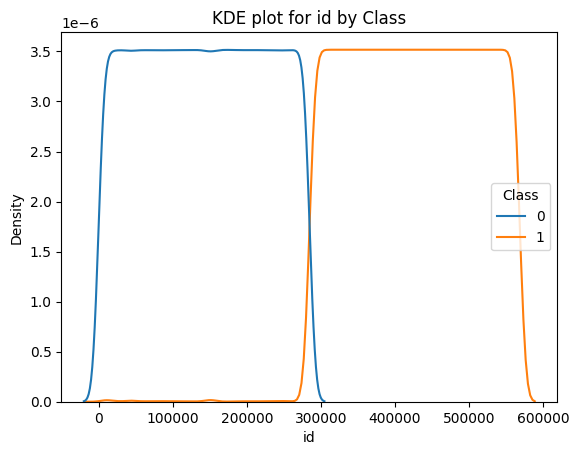

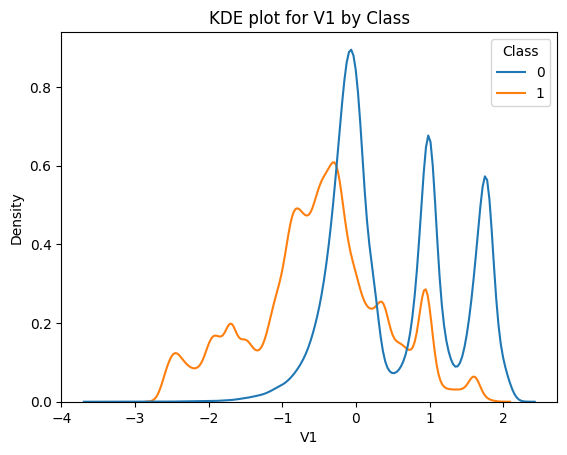

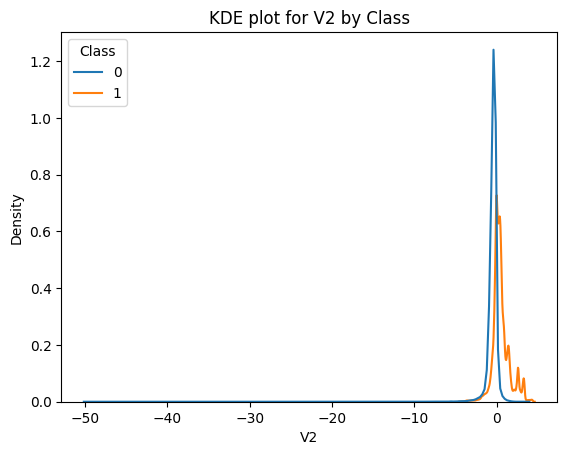

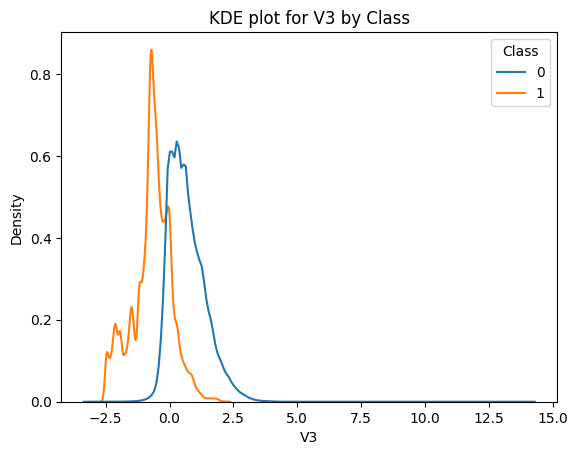

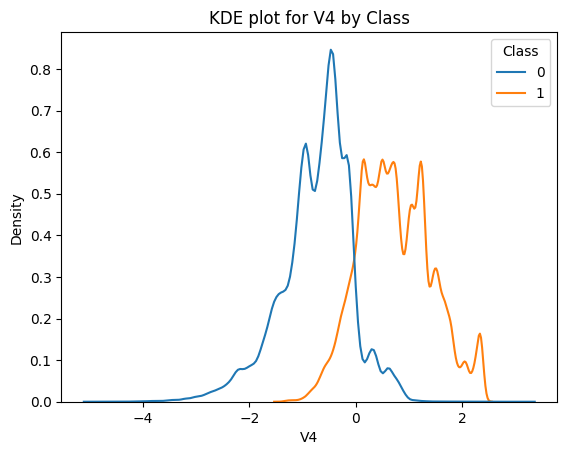

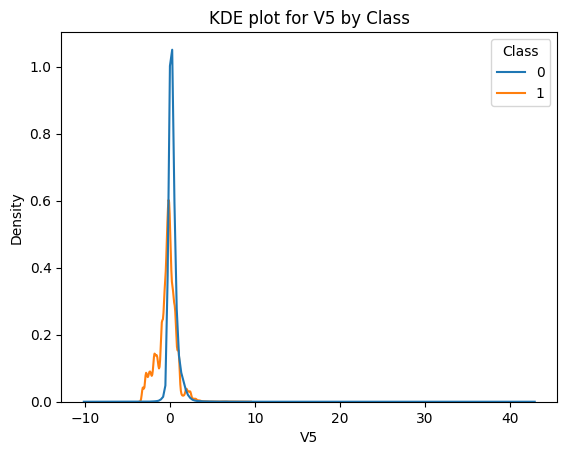

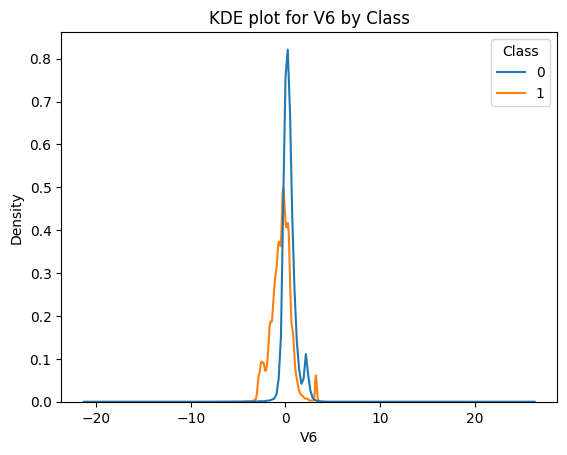

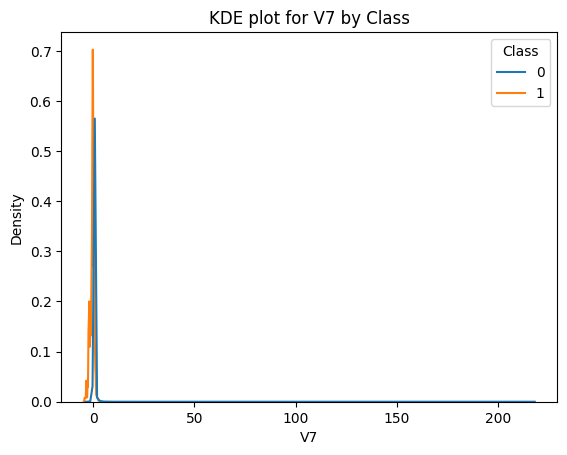

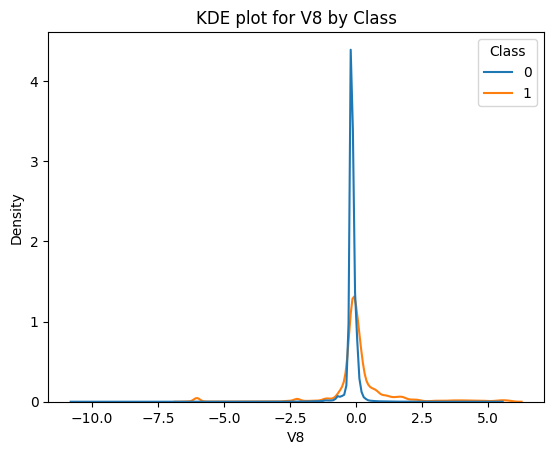

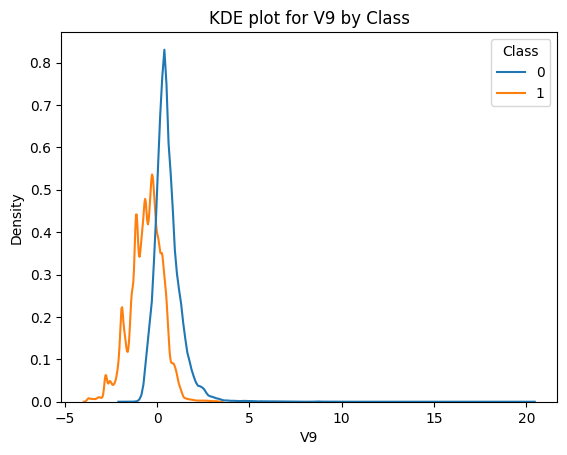

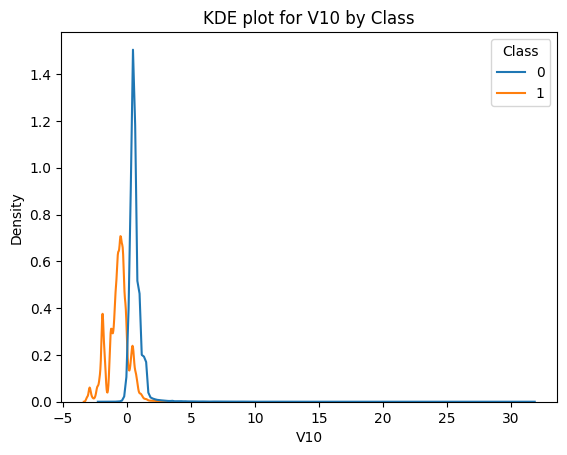

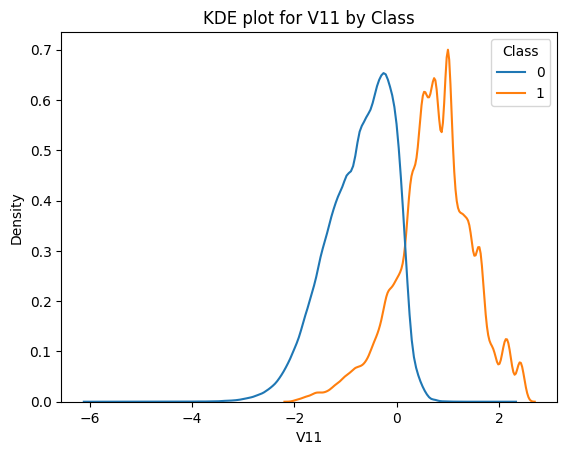

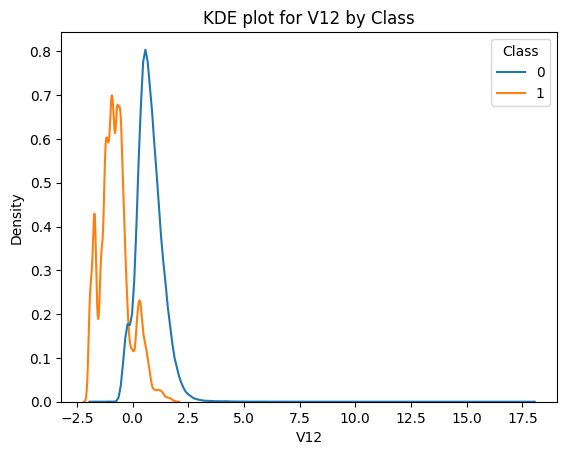

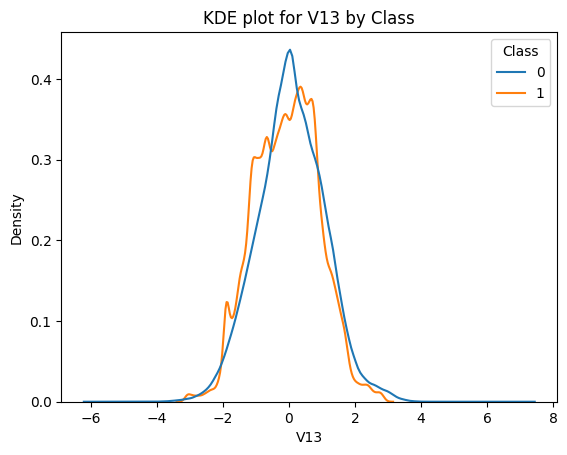

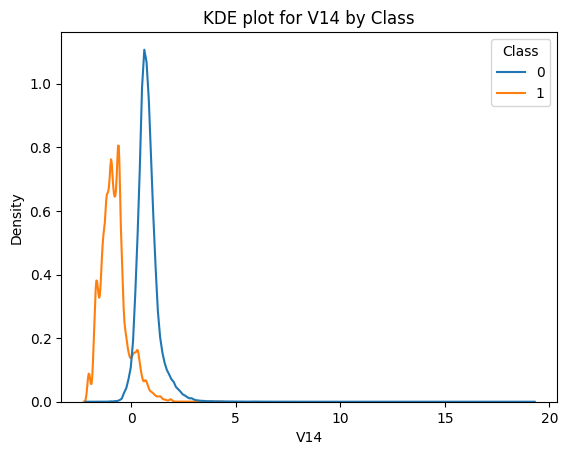

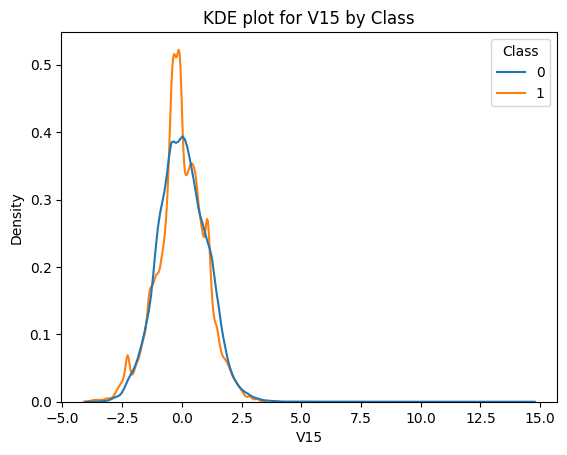

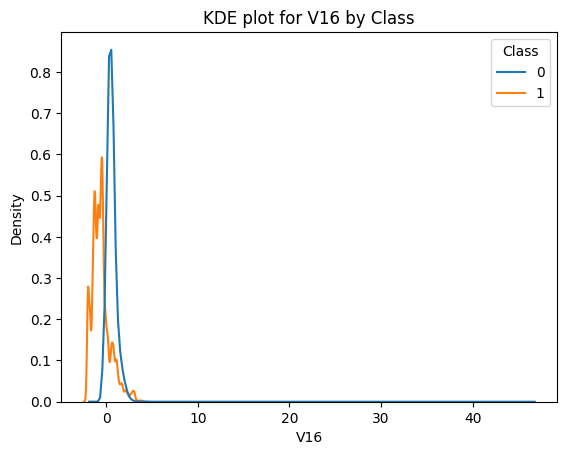

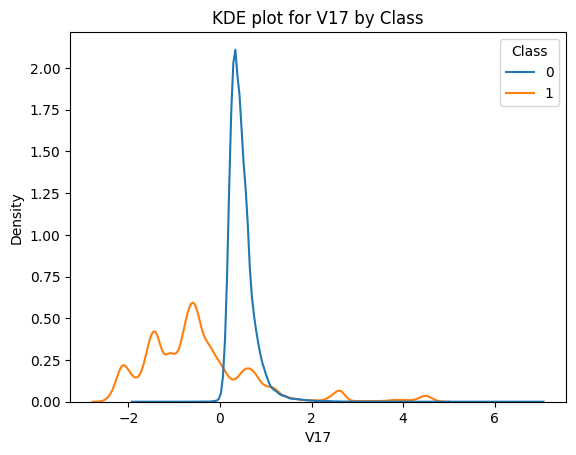

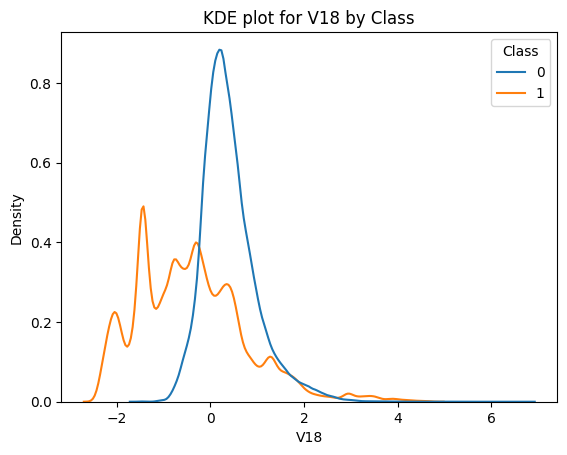

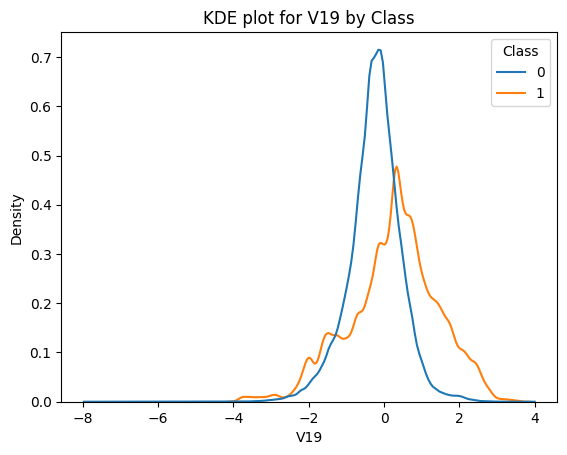

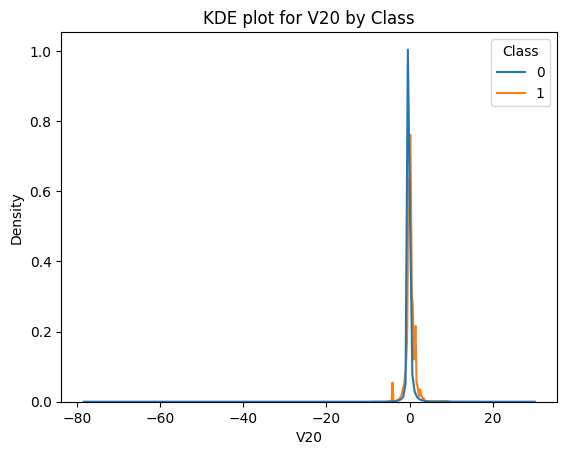

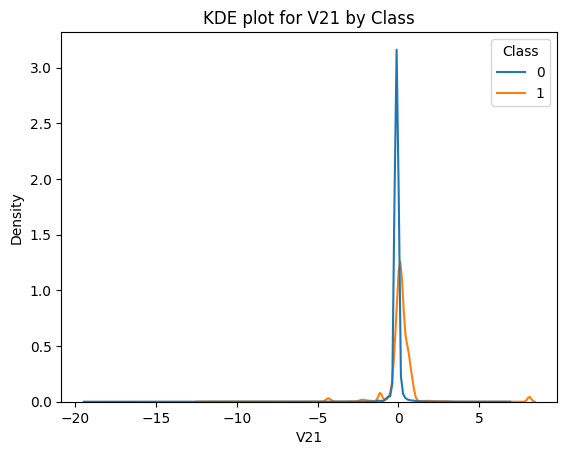

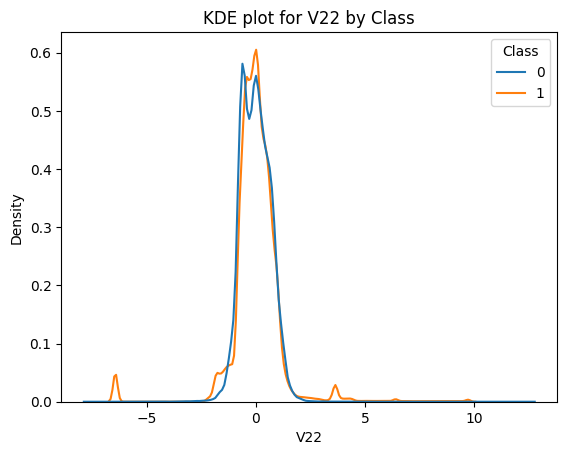

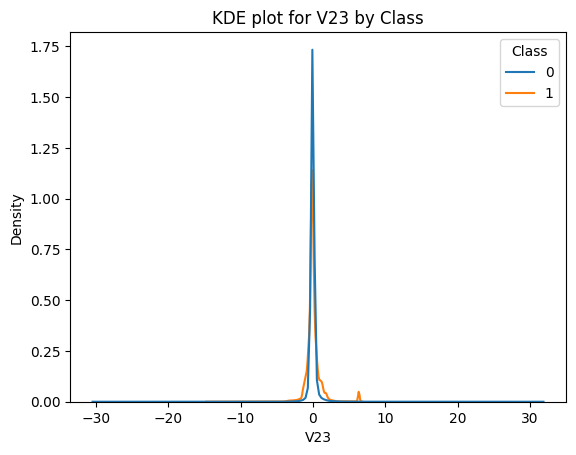

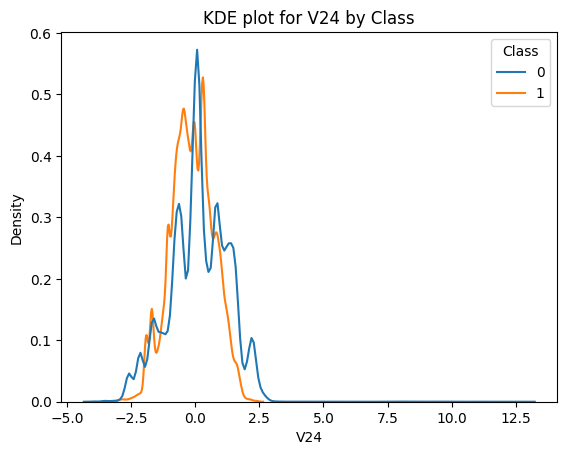

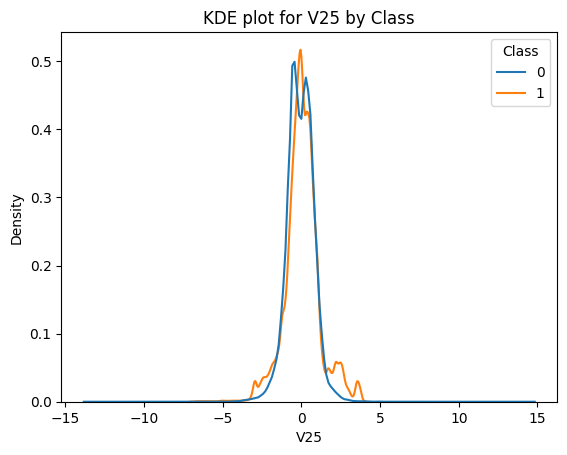

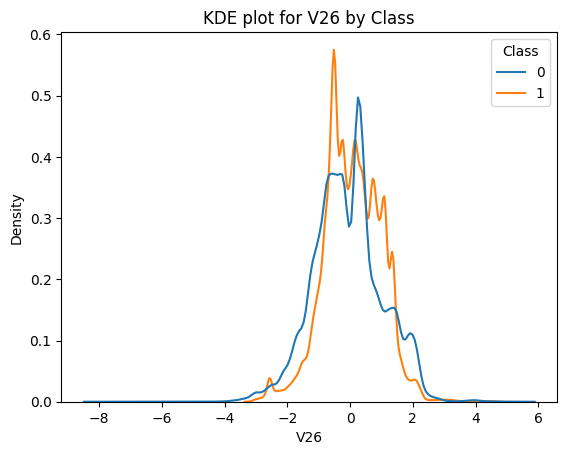

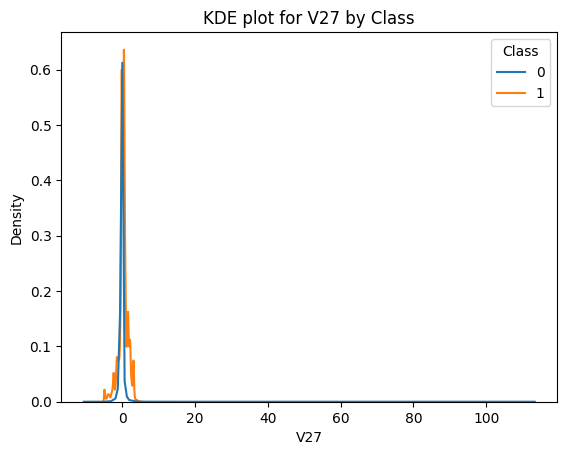

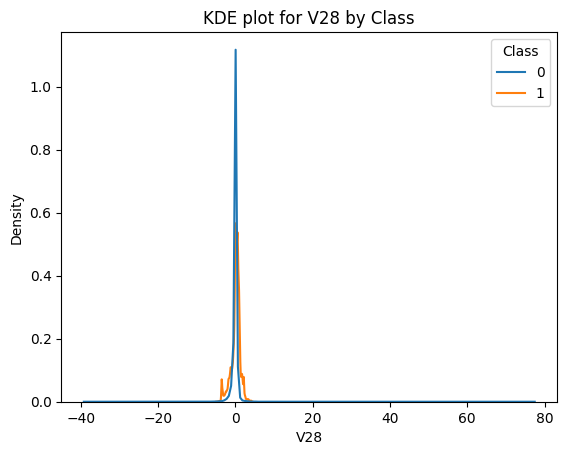

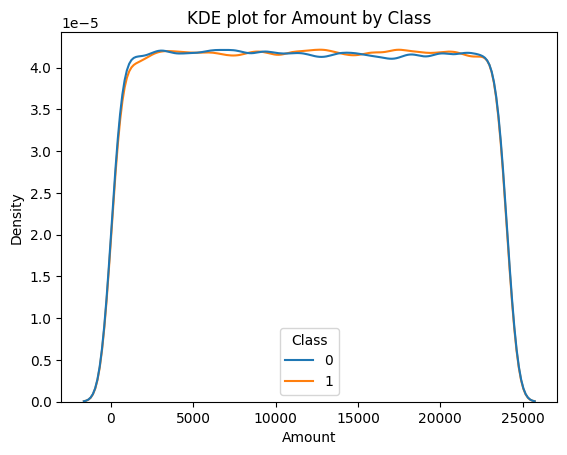

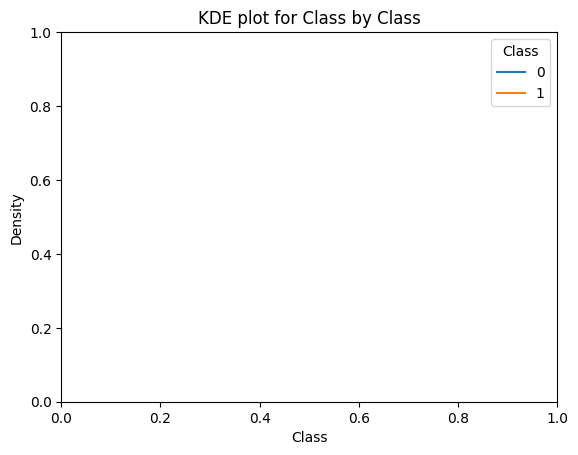

In [ ]:

for col in df.columns:

  sns.kdeplot(data=df, hue='Class', x=col, common_norm=False)
  plt.title(f'KDE plot for {col} by Class')
  plt.show()
  ""

In [ ]:
import numpy as np

cols_to_process = [col for col in df.columns if col not in ['id', 'Amount', 'Class']]

for col in cols_to_process:
    lower = df[col].quantile(0.0015)
    upper = df[col].quantile(0.9985)
    df[col] = df[col].apply(lambda x: x if lower <= x <= upper else np.nan)

df = df.dropna()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543169 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      543169 non-null  int64  
 1   V1      543169 non-null  float64
 2   V2      543169 non-null  float64
 3   V3      543169 non-null  float64
 4   V4      543169 non-null  float64
 5   V5      543169 non-null  float64
 6   V6      543169 non-null  float64
 7   V7      543169 non-null  float64
 8   V8      543169 non-null  float64
 9   V9      543169 non-null  float64
 10  V10     543169 non-null  float64
 11  V11     543169 non-null  float64
 12  V12     543169 non-null  float64
 13  V13     543169 non-null  float64
 14  V14     543169 non-null  float64
 15  V15     543169 non-null  float64
 16  V16     543169 non-null  float64
 17  V17     543169 non-null  float64
 18  V18     543169 non-null  float64
 19  V19     543169 non-null  float64
 20  V20     543169 non-null  float64
 21  V21     543169 

Less than 5% of data dropped, nice.

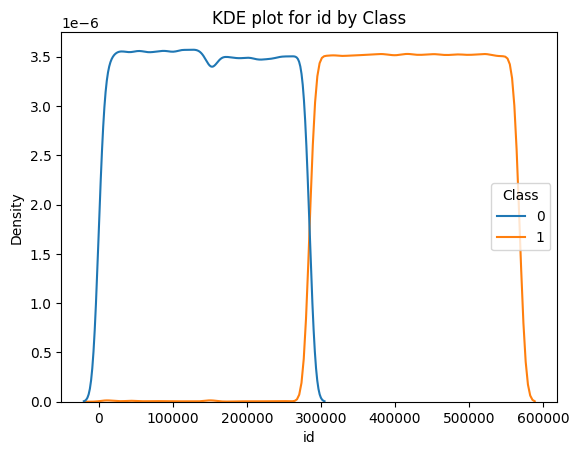

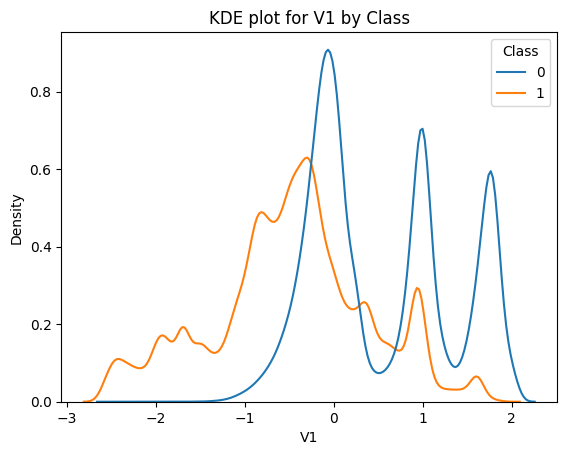

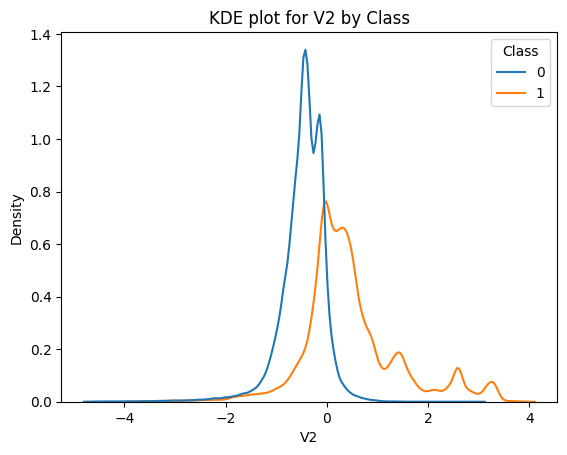

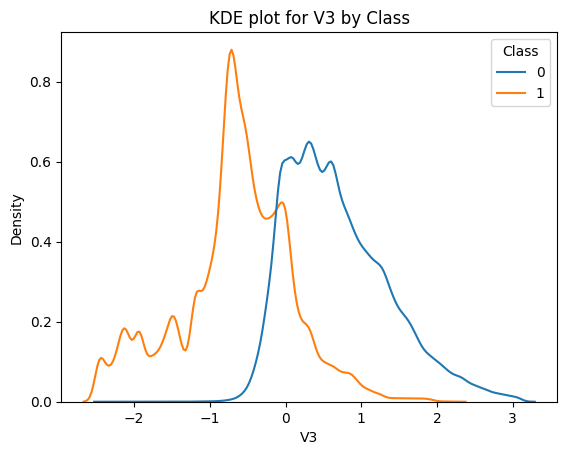

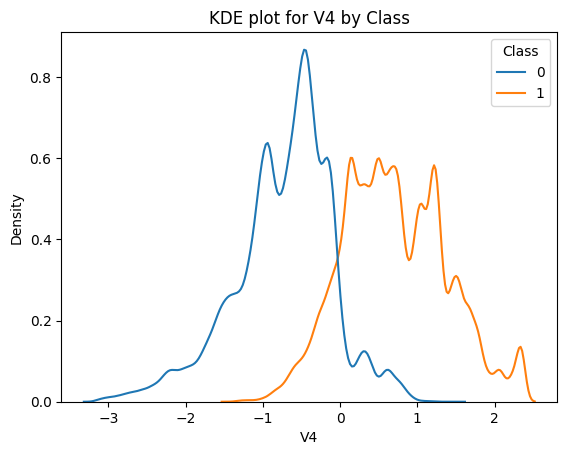

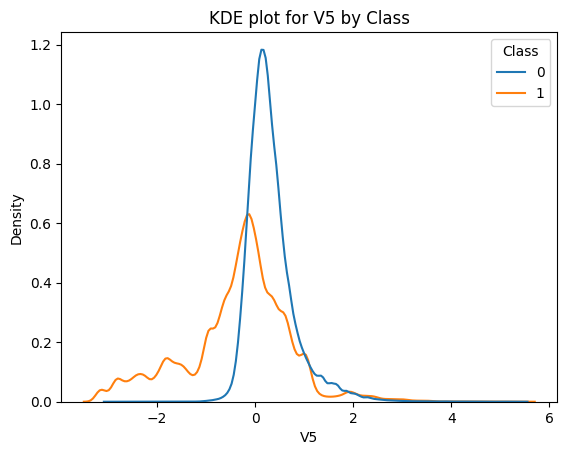

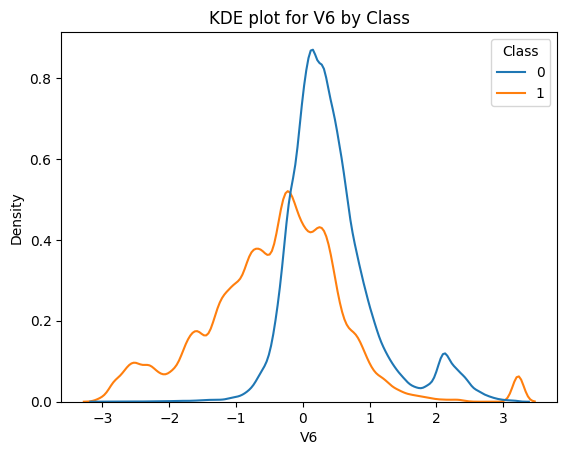

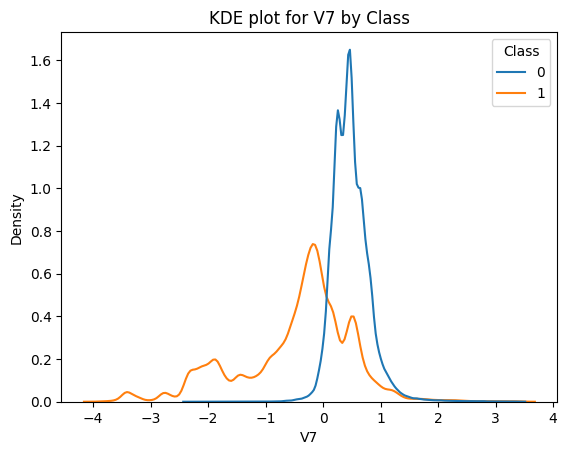

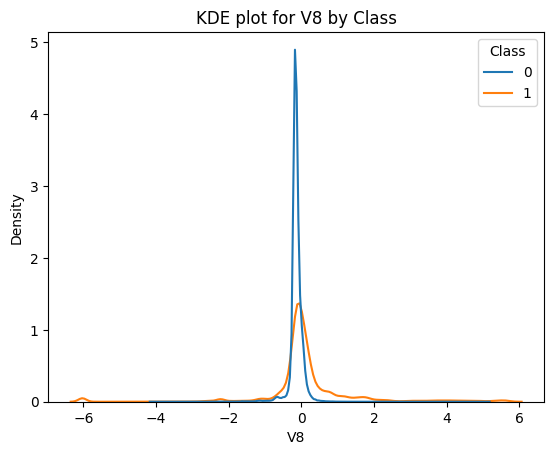

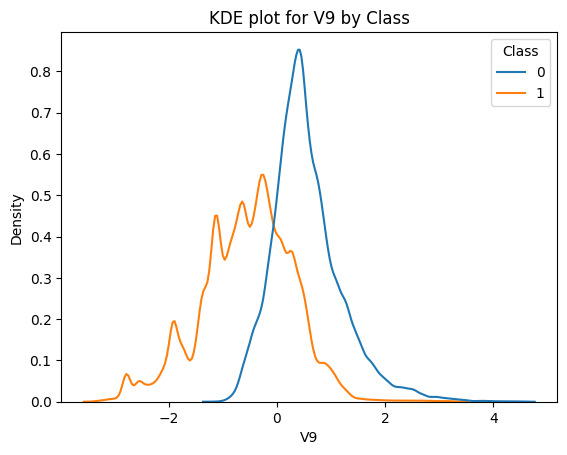

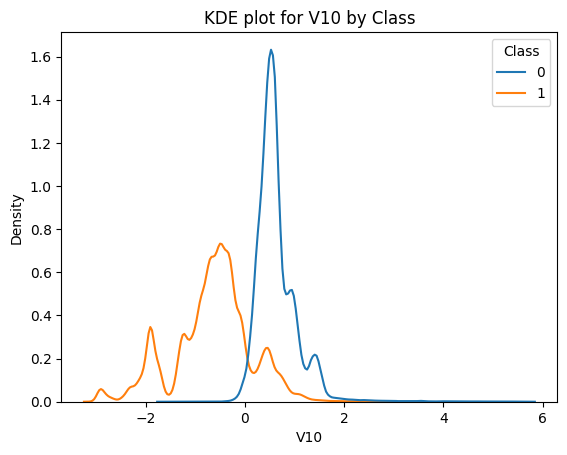

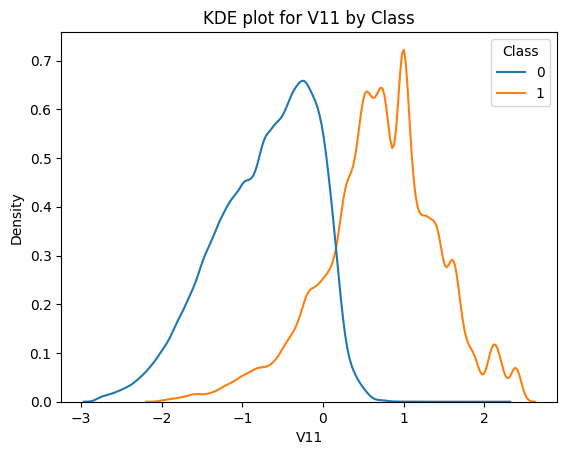

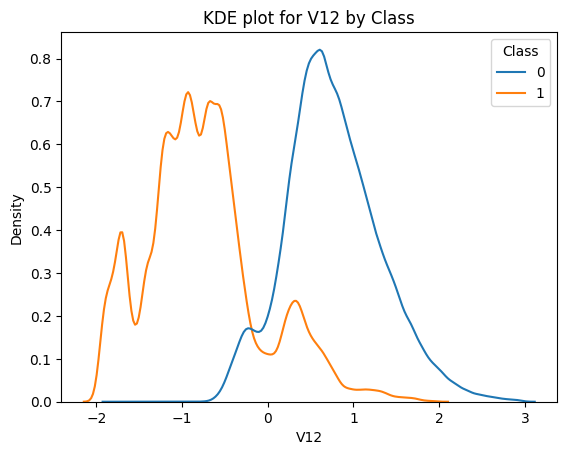

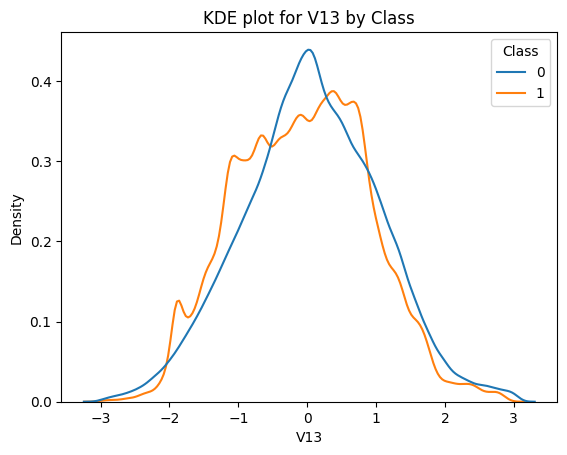

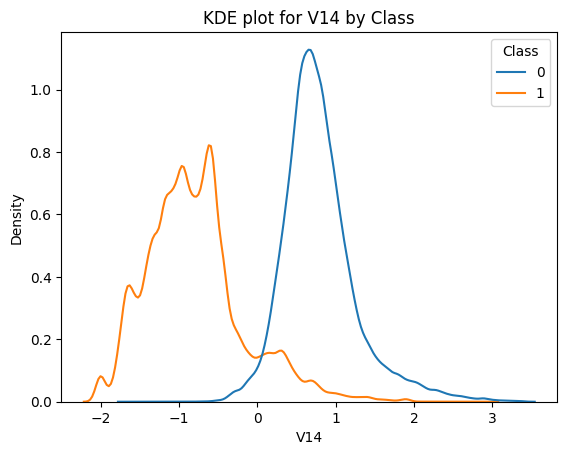

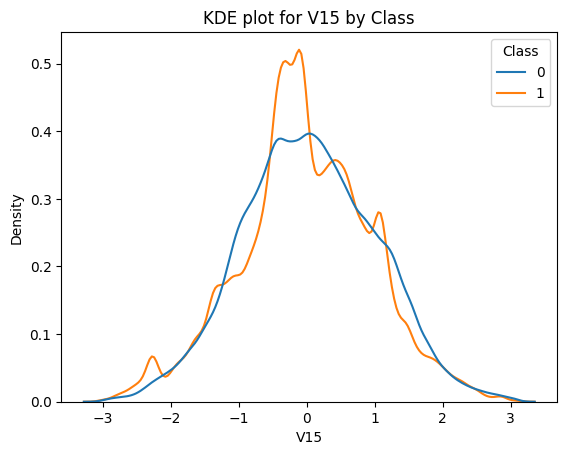

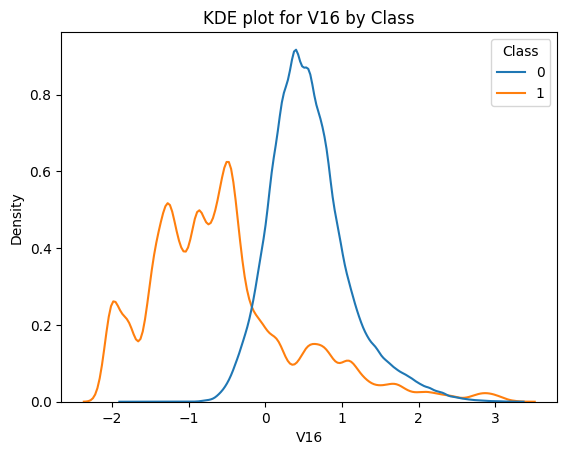

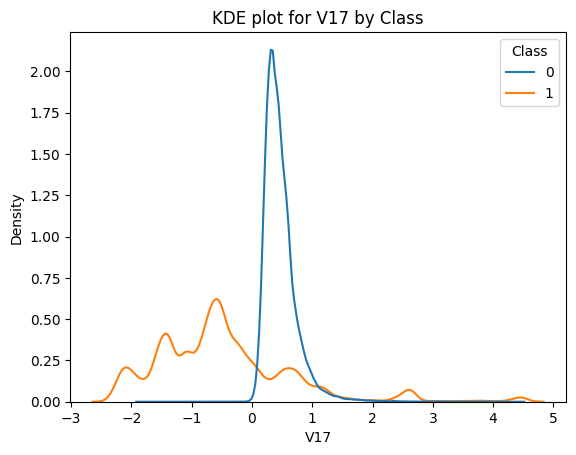

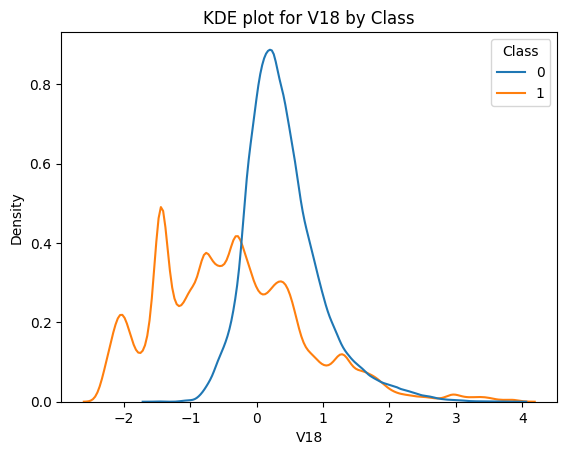

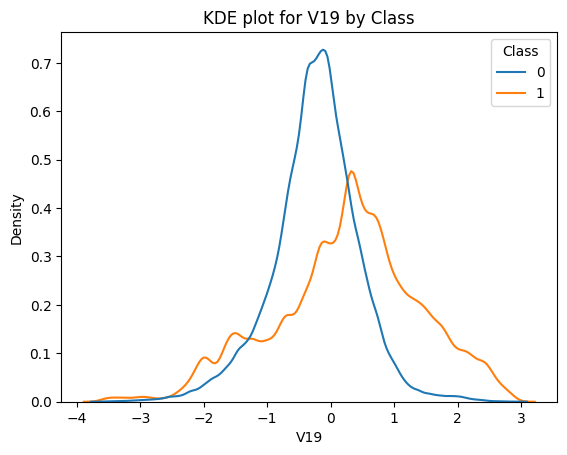

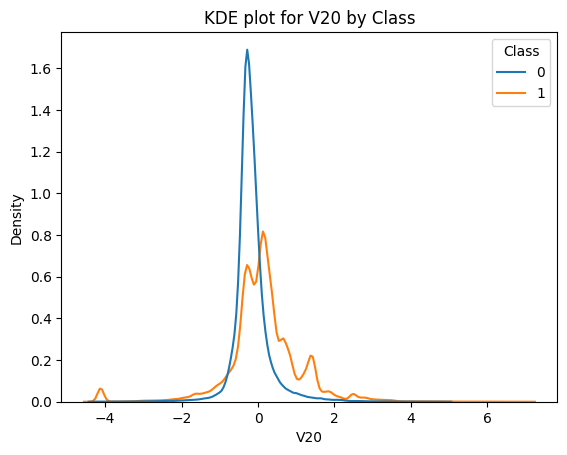

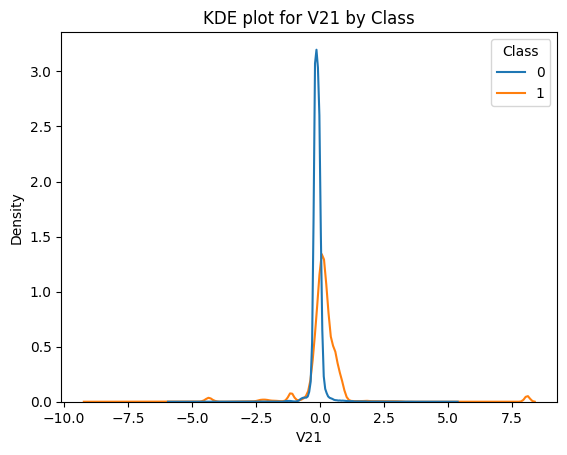

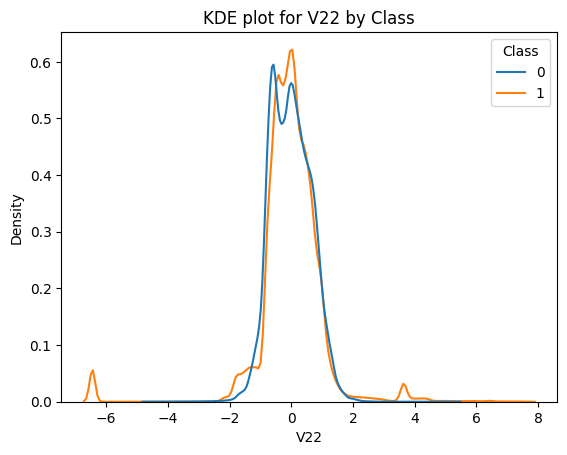

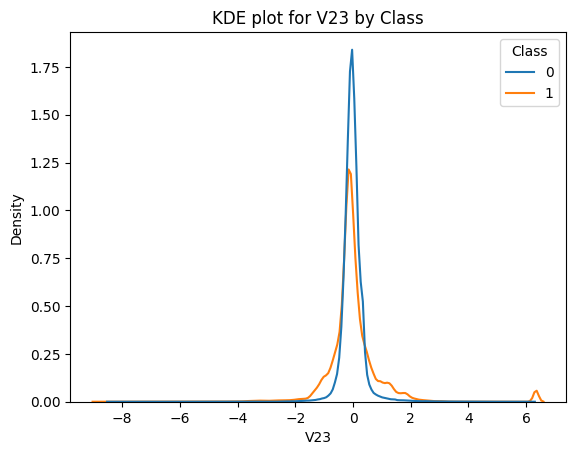

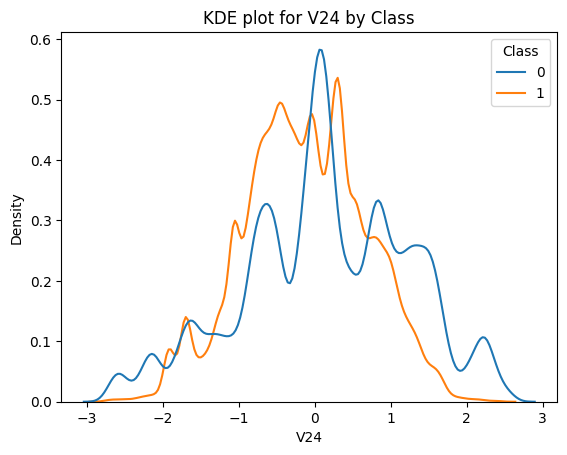

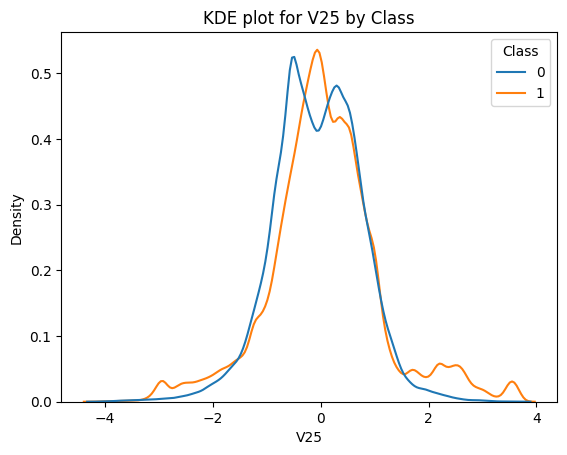

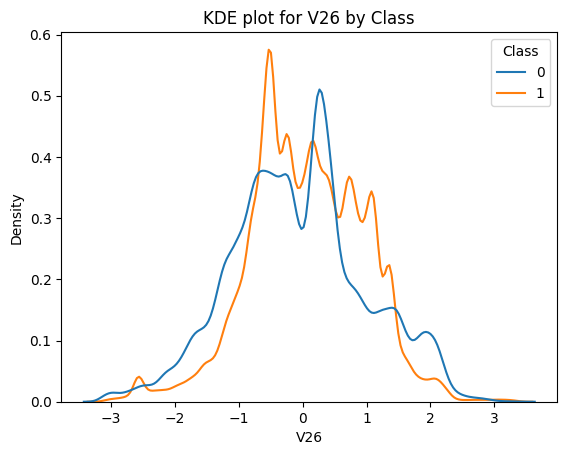

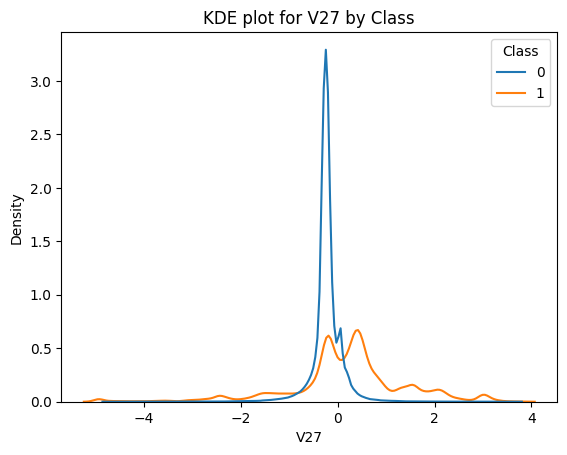

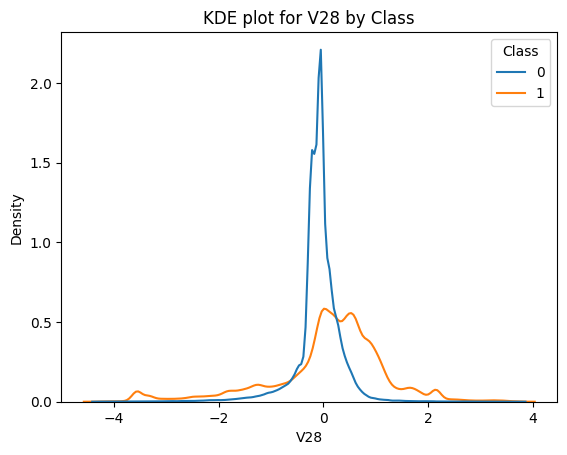

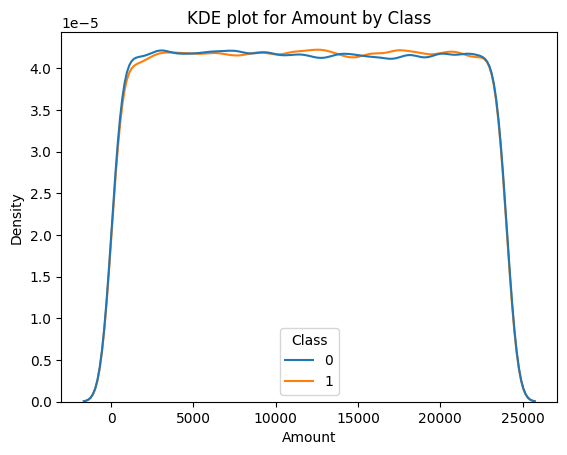

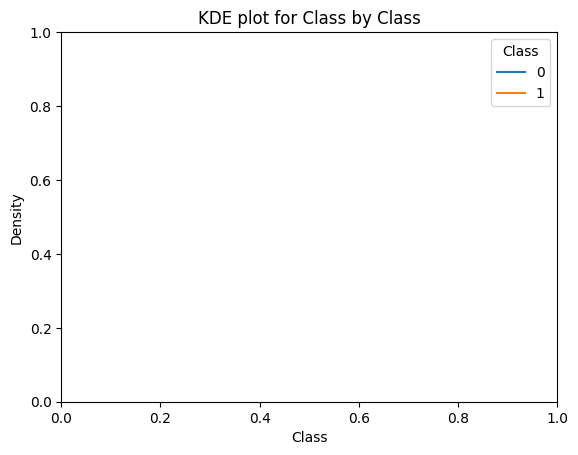

In [ ]:

for col in df.columns:

  sns.kdeplot(data=df, hue='Class', x=col, common_norm=False)
  plt.title(f'KDE plot for {col} by Class')
  plt.show()


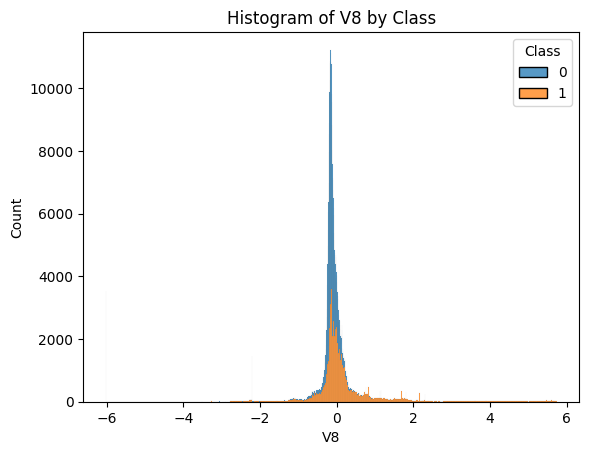

In [ ]:
sns.histplot(data=df, x='V8', hue='Class', multiple="stack")
plt.title('Histogram of V8 by Class')
plt.show()

In [ ]:

cols_to_process = [col for col in df.columns if col not in ['id', 'Amount', 'Class']]
threshold = 0.1
for i in cols_to_process:
  if i !='densities' and i in cols_to_process:
    df = df.drop(df[df[i] == 0].index)
    values = [df[i]]
    kde = sp.stats.gaussian_kde(values)
    densities = kde(values)
    df['densities'] = densities
    thresh = np.percentile(densities, threshold)
    df = df[df['densities'] > thresh]
    df = df.drop(['densities'], axis=1)


NameError: name 'df' is not defined

<Axes: >

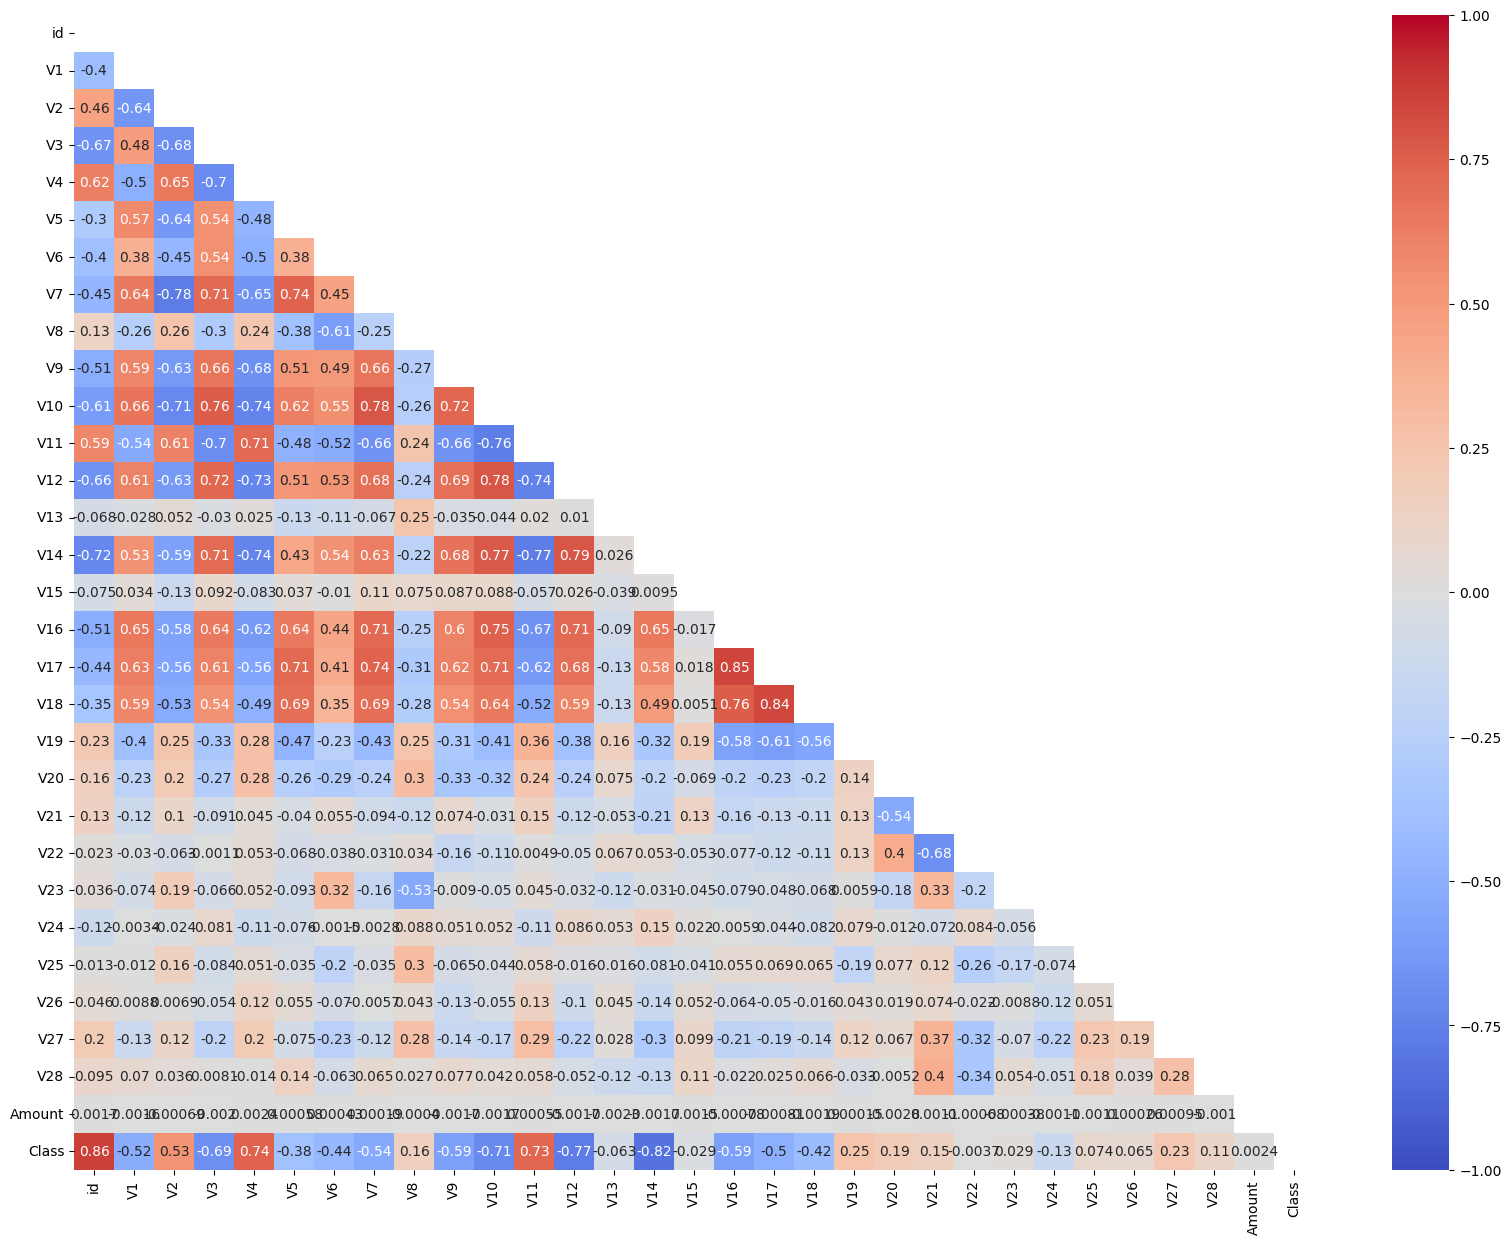

In [ ]:
plt.figure(figsize=(20, 15))
corr_matrix = df.select_dtypes('number').corr()

#Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Plot the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

In [ ]:
df.drop(['id', 'V13', 'V15', 'V22', 'V23', 'V25', 'V26',  'Amount'], axis=1, inplace=True)

<Axes: >

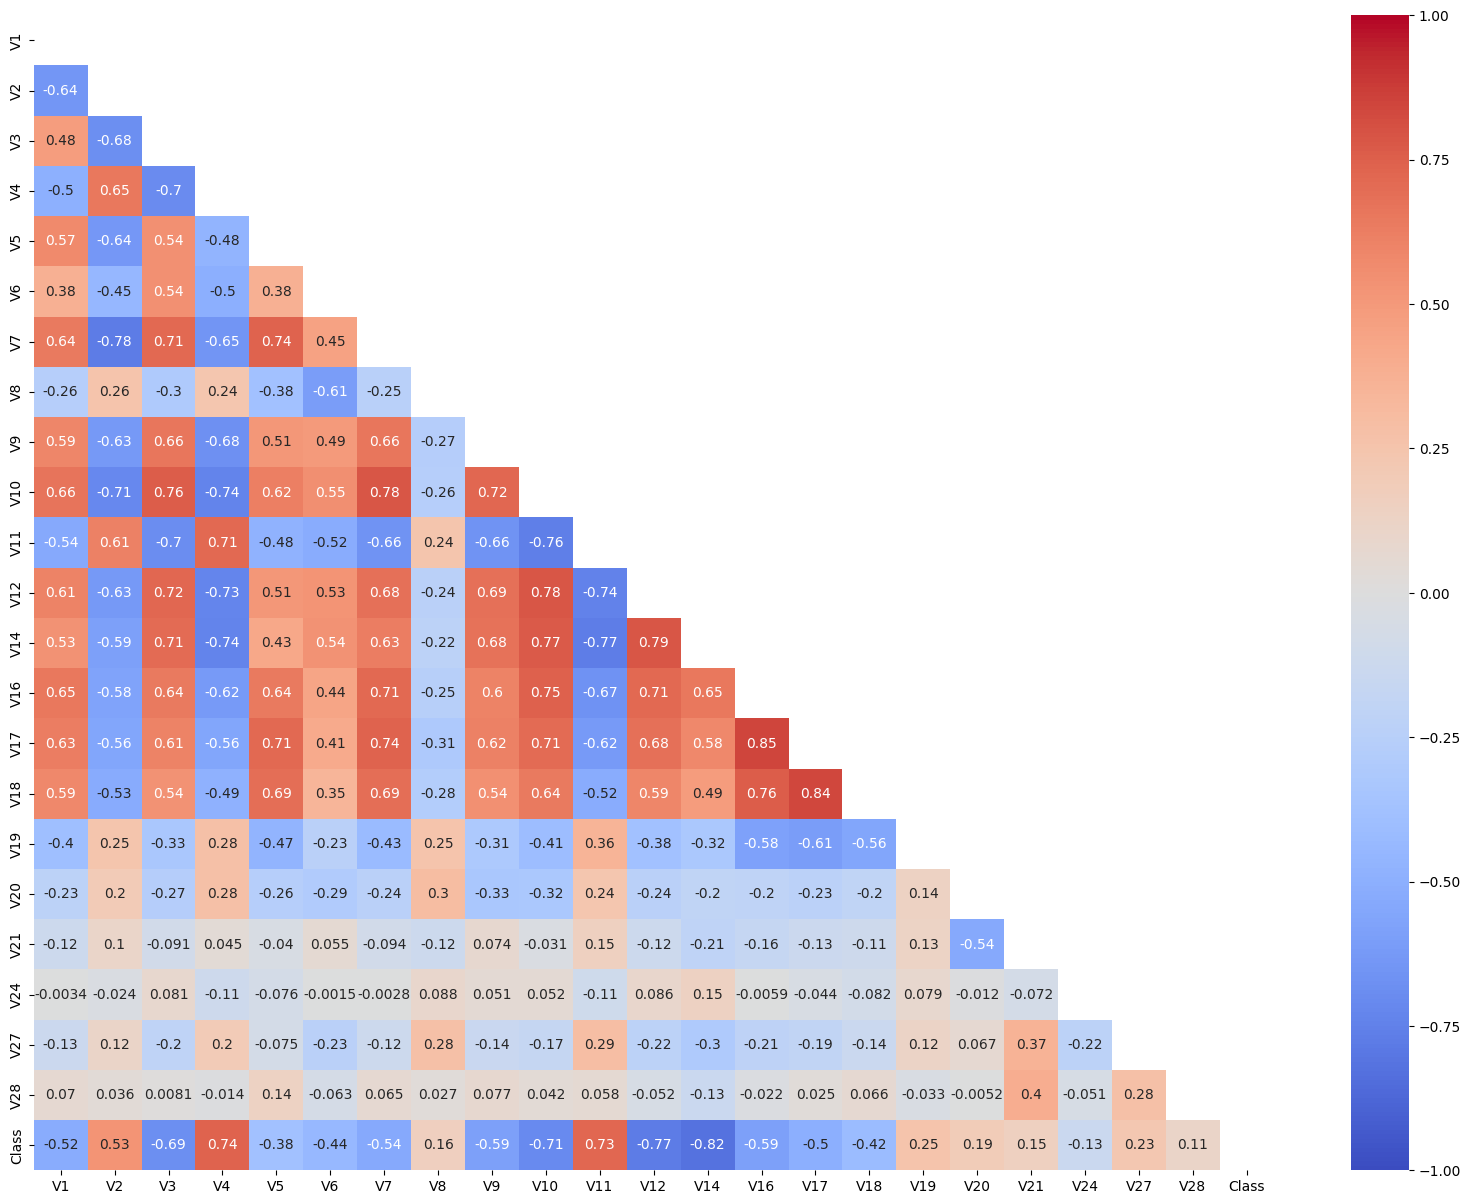

In [ ]:
plt.figure(figsize=(20, 15))
corr_matrix = df.select_dtypes('number').corr()

#Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Plot the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

# Models


In [ ]:
def cleanTrain(df):
  import numpy as np
  cols_to_process = [col for col in df.columns if col not in ['id', 'Amount', 'Class']]

  for col in cols_to_process:
    lower = df[col].quantile(0.0015)
    upper = df[col].quantile(0.9985)
    df[col] = df[col].apply(lambda x: x if lower <= x <= upper else np.nan)
  df = df.dropna()
  print(df.info())
  df.drop(['id', 'V13', 'V15', 'V22', 'V23', 'V25', 'V26',  'Amount'], axis=1, inplace=True)
  return df

In [ ]:
def cleanTest(df):
  df.drop(['id', 'V13', 'V15', 'V22', 'V23', 'V25', 'V26',  'Amount'], axis=1, inplace=True)
  return df

In [ ]:
def splitEvaluate(df, model):
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  accuracies = []
  for i in range(50):
    train, test = train_test_split(
        df,
        train_size=0.8,
        random_state=i
    )
    train = cleanTrain(train)
    test = cleanTest(test)
    X_train = train.drop('Class', axis=1)
    y_train = train['Class']
    X_test = test.drop('Class', axis=1)
    y_test = test['Class']

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
  print()
  print(accuracies)
  print(sum(accuracies)/len(accuracies))

In [ ]:
#models
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#rand forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
import numpy as np
#catBoost
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

#XGBoost
import xgboost as xg
import numpy as np
xgb = xg.XGBClassifier(
    objective='reg:accuracy',
)

#SVM
from sklearn.svm import SVC
import numpy as np
svr = SVC()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

rfcool = RandomForestClassifier()

from sklearn.ensemble import VotingClassifier
voting_Classifier = VotingClassifier(
    estimators=[('knn', knn), ('rf', rf), ('xgb', xgb), ('svr', svr)],
    weights=[0.25,0.25,0.25,0.25])

In [ ]:
#df = pd.read_csv("C:/Users/75025/Downloads/archive (4) 2/creditcard_2023.csv")
df = pd.read_csv("/jobs/creditcard_2023.csv")
model = knn

splitEvaluate(df, model)

<class 'pandas.core.frame.DataFrame'>
Index: 434474 entries, 404922 to 305711
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      434474 non-null  int64  
 1   V1      434474 non-null  float64
 2   V2      434474 non-null  float64
 3   V3      434474 non-null  float64
 4   V4      434474 non-null  float64
 5   V5      434474 non-null  float64
 6   V6      434474 non-null  float64
 7   V7      434474 non-null  float64
 8   V8      434474 non-null  float64
 9   V9      434474 non-null  float64
 10  V10     434474 non-null  float64
 11  V11     434474 non-null  float64
 12  V12     434474 non-null  float64
 13  V13     434474 non-null  float64
 14  V14     434474 non-null  float64
 15  V15     434474 non-null  float64
 16  V16     434474 non-null  float64
 17  V17     434474 non-null  float64
 18  V18     434474 non-null  float64
 19  V19     434474 non-null  float64
 20  V20     434474 non-null  float64
 21  V21     43